#### LINEAR MODELS FOR CLASSIFICATION
Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:

                ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero. If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1.

This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients (w) and the intercept (b).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
current_palette = sns.color_palette("Set2")
sns.set_palette(current_palette)
np.set_printoptions(suppress=True, precision=3)
pd.set_option("display.precision",3)

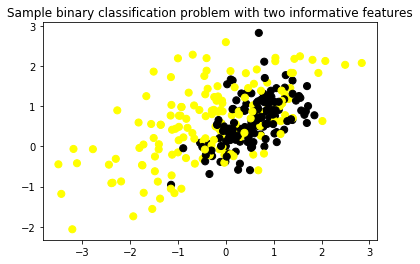

In [2]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()

plt.title('Sample binary classification problem with two informative features')
X_C, y_C = make_classification(n_samples = 300, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = .5, random_state=0)
plt.scatter(X_C[:, 0], X_C[:, 1], c=y_C,marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [3]:
logreg = LogisticRegression( solver="lbfgs")
X_train,X_test,y_train,y_test  = train_test_split(X_C,y_C,random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
from sklearn.model_selection import cross_val_score
lr_train_scores  = cross_val_score(logreg, X_train, y_train, cv=5)
lr_test_scores  = cross_val_score(logreg, X_test, y_test, cv=5)
print("Logistic Regression train scores:{0}".format(lr_train_scores))
print("Logistic Regression test scores:{0}".format(lr_test_scores))

Logistic Regression train scores:[ 0.739  0.711  0.667  0.689  0.75 ]
Logistic Regression test scores:[ 0.733  0.667  0.867  0.667  0.667]


In [5]:
dec_function_train =logreg.decision_function(X_train)
dec_function_test =logreg.decision_function(X_test)


In [6]:
dec_function_test

array([-3.949,  0.48 ,  0.907,  1.668, -0.29 ,  1.797, -1.491, -1.496,
       -0.81 ,  0.479,  0.375,  0.582,  0.063,  0.349, -0.059,  0.552,
       -3.768,  1.03 ,  0.498,  0.673,  1.693,  1.389,  0.077,  0.395,
       -0.397,  1.219, -0.45 ,  1.562,  0.258, -0.189, -2.018,  0.288,
        0.838,  0.714,  1.026, -0.495,  0.991,  1.181, -0.204, -2.03 ,
       -2.177,  0.127,  0.355,  0.78 ,  1.482,  0.383,  0.711, -0.592,
       -1.37 , -0.172, -0.969,  0.905,  0.043, -0.357, -1.687, -1.266,
        0.388,  0.29 ,  1.471, -1.848,  2.609, -0.662,  2.33 ,  1.366,
       -2.858, -0.114, -3.017,  0.335, -0.198,  1.086, -0.087,  1.013,
        1.096, -0.176, -0.49 ])

In [7]:
predict_proba_train = logreg.predict_proba(X_train)
predict_proba_test = logreg.predict_proba(X_test)

In [8]:
predict_proba_test[0:10]

array([[ 0.981,  0.019],
       [ 0.382,  0.618],
       [ 0.288,  0.712],
       [ 0.159,  0.841],
       [ 0.572,  0.428],
       [ 0.142,  0.858],
       [ 0.816,  0.184],
       [ 0.817,  0.183],
       [ 0.692,  0.308],
       [ 0.382,  0.618]])

In [9]:
y_pred = logreg.predict(X_test)
print("Predicted Values:")
print(y_pred[0:10])
print("Correct Values:")
print(y_test[0:10])

Predicted Values:
[0 1 1 1 0 1 0 0 0 1]
Correct Values:
[0 0 1 0 0 1 0 0 0 1]


#### Multiclass Logistic Regression

In [11]:
from sklearn.datasets import load_iris
iris =  load_iris()
iris_map ={index:value for index,value in enumerate(iris.target_names) }
print(iris_map)


data = pd.DataFrame(data = iris.data , columns =iris.feature_names)  
target = pd.DataFrame(data = iris.target ,columns =['class'] )

iris_dataset  =pd.concat([data,target],axis=1)
print("="*80)
print(iris.target)
print(iris_dataset.shape)
print(data.shape)
print(target.shape) 
print("="*80)
print(iris_dataset.head())

X_train,X_test,y_train,y_test  = train_test_split(data,target,random_state=42)


logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs")
logreg.fit(X_train, y_train.values.ravel())
 


lr_train_scores  = cross_val_score(logreg, X_train, y_train.values.ravel(), cv=5)
lr_test_scores  = cross_val_score(logreg, X_test, y_test.values.ravel(), cv=5)
print("="*80)
print("Logistic Regression scores:{0}".format(lr_train_scores))
print("Logistic Regression scores:{0}".format(lr_test_scores))
print("="*80)
from sklearn import metrics
from sklearn.metrics import roc_curve
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred

y_pred_train=measure_performance(X_train,y_train,logreg, show_accuracy=True, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)
print("="*80)
y_pred=measure_performance(X_test,y_test,logreg, show_accuracy=True, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 5)
(150, 4)
(150, 1)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  
Logistic Regression scores:[ 1.     1.     0.87   1.     0.952]
Logistic Regres